<a href="https://colab.research.google.com/github/cszafariqbal/Machine_Learning_Projects/blob/main/sentiments_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload the datset on google colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving agr_en_fb_gold.csv to agr_en_fb_gold.csv


#import library

In [ ]:
import pandas as pd
import numpy as np


#Import Datasets

In [ ]:
train_df = pd.read_csv('agr_en_train.csv')
test_df = pd.read_csv('agr_en_fb_gold.csv')

In [ ]:
train_df

,source,comment,label
0,facebook_corpus_msr_1723796,Well said sonu..you have courage to stand agai...,OAG
1,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
2,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG
3,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG
4,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG
...,...,...,...
11994,facebook_corpus_msr_394638,They belong to you flight dirty terrorist coun...,OAG
11995,facebook_corpus_msr_429177,"Really motivating programme, congratulations t...",NAG
11996,facebook_corpus_msr_2032370,fabricated news,OAG
11997,facebook_corpus_msr_1722926,What's wrong with you secular idiots,OAG


In [ ]:
test_df

,source,comment,label
0,facebook_corpus_msr_396174,If government of india don't take strict actio...,NAG
1,facebook_corpus_msr_422473,So now we know. The women should be under the ...,NAG
2,facebook_corpus_msr_341422,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ हो जाओगे,NAG
3,facebook_corpus_msr_481654,Do you think markets are gonna be sideways til...,NAG
4,facebook_corpus_msr_427757,Jago Urjut Jago....\nSave common people from\n...,NAG
...,...,...,...
911,facebook_corpus_msr_322509,"Where is that illegitimate kid o communists, c...",CAG
912,facebook_corpus_msr_397216,Anil Chaurasia galian men bhi de sakta hon kyu...,OAG
913,facebook_corpus_msr_466506,Never opened his mouth when PM..now he speaks....,OAG
914,facebook_corpus_msr_441285,Chit fund operators n loan sharks r more honest,CAG


#data preprocessing

In [ ]:
train_df.comment.sample(10).values

array(["Erm no it hasn't.\nThere was no ban in 201, new vetting procedures were put inplace wich slowed immigration during the switch from old too new - but at no point was anyone banned.\nhttp://uk.businessinsider.com/big-differences-between-trumps-immigration-ban-obamas-2011-policy-2017-2?r=US&IR=T\n\nI ifnd it funny how you insult others for their lack of research whilst proving you havent done any yourself. Amazing.",
       'It is so pathetic and disgusting to see the  slums on both sides of railway lines from Virar to Churchgate and from Kalyan to VT',
       'Two bad days... In the long run demonetization is good for the market',
       'Should it post good results since Federal gave good results..south based bank',
       "Remove modi's face from every banner existed in every peṭrol pump and advartisment too if you are not completely sold, SEC",
       "Ah...  Is it so... Well like I said I don't need certificate from idiots.",
       'Angry emoji on army post\nReally 🙅',
     

In [ ]:
test_df.comment.sample(10).values

array(['These people are rogues who have looted the country for over 60 years.\nIf they are genuine let them form one party NOT GADHBANDHAN, and fight the election',
       'this project was given to the ISRO by the govt 10 months earlier otherwise there were no plans of building a satellite for saarc nations',
       'Congrats.... Finally our Ex PM has come out from COMA great achievement for Modiji....',
       'What I always dream about when I was an Adolescent ! Chalo shuruaat to Hui ..all the best galz..!',
       'Why only in certain states they kill human beings for the sake of cows. Well in Kerala the Hindus relish on beef. Is there anyone dare to kill a keralite for not giving importance to a cow.',
       'Proud to be a part of Jamshedpur , Jharkhand... also due to Ratan Tata , Mr Dhoni',
       'don\'t worry about them RANDTV ..they will met their "HOOR" soon in jannat ..',
       'This is best way to get votes. No one ask govt. achievement by naming PAK. Even these days the

<Axes: >

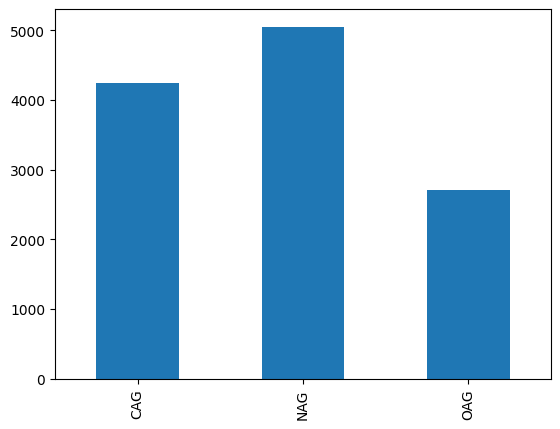

In [ ]:
train_df.label.value_counts().sort_index().plot(kind='bar')

<Axes: >

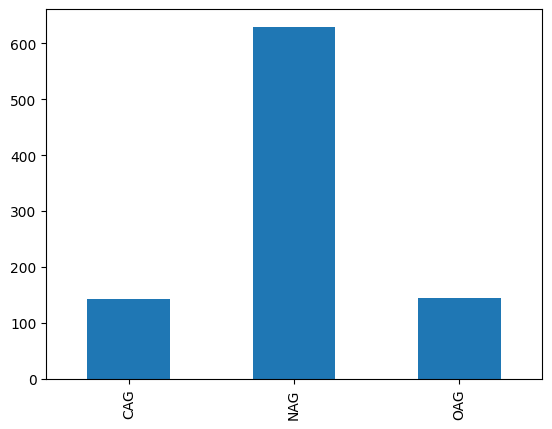

In [ ]:
test_df.label.value_counts().sort_index().plot(kind='bar')

In [ ]:
train_df.label.value_counts()

NAG    5051
CAG    4240
OAG    2708
Name: label, dtype: int64

In [ ]:
# convert label to a numerical variable
train_df['label_num'] = train_df.label.map({'OAG':0, 'CAG':1, 'NAG':2})
train_df.head()

,source,comment,label,label_num
0,facebook_corpus_msr_1723796,Well said sonu..you have courage to stand agai...,OAG,0
1,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG,2
2,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG,0
3,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG,0
4,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG,2


#data cleaning

In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_process(mess):

    STOPWORDS = stopwords.words('english')

    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_df['clean_comment'] = train_df.comment.apply(text_process)

train_df.head()

,source,comment,label,label_num,clean_comment
0,facebook_corpus_msr_1723796,Well said sonu..you have courage to stand agai...,OAG,0,Well said sonuyou courage stand dadagiri Muslims
1,facebook_corpus_msr_466073,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG,2,Private Banks ATMs Like HDFC ICICI etc cash Pu...
2,facebook_corpus_msr_1493901,"Now question is, Pakistan will adhere to this?",OAG,0,question Pakistan adhere
3,facebook_corpus_msr_405512,Pakistan is comprised of fake muslims who does...,OAG,0,Pakistan comprised fake muslims know meaning u...
4,facebook_corpus_msr_1521685,"??we r against cow slaughter,so of course it w...",NAG,2,r cow slaughterso course stop leather manufact...


In [ ]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)
train_df["clean_comment"] = train_df["clean_comment"].apply(remove_emojis)


In [ ]:
X = train_df.clean_comment
y = train_df.label_num

In [ ]:
X

0         Well said sonuyou courage stand dadagiri Muslims
1        Private Banks ATMs Like HDFC ICICI etc cash Pu...
2                                 question Pakistan adhere
3        Pakistan comprised fake muslims know meaning u...
4        r cow slaughterso course stop leather manufact...
                               ...                        
11994         belong flight dirty terrorist country india 
11995    Really motivating programme congratulations CN...
11996                                      fabricated news
11997                           Whats wrong secular idiots
11998    Looks like inevitable political hard ball dial...
Name: clean_comment, Length: 11999, dtype: object

#label encoding

In [ ]:
# convert label to a numerical variable
test_df['label_num'] = test_df.label.map({'OAG':0, 'CAG':1, 'NAG':2})
test_df['clean_comment'] = test_df.comment.apply(text_process)
test_df["clean_comment"] = test_df["clean_comment"].apply(remove_emojis)

test_df.head()

,source,comment,label,label_num,clean_comment
0,facebook_corpus_msr_396174,If government of india don't take strict actio...,NAG,2,government india dont take strict action China...
1,facebook_corpus_msr_422473,So now we know. The women should be under the ...,NAG,2,know women veil dumb country made think cool
2,facebook_corpus_msr_341422,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ हो जाओगे,NAG,2,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ हो जाओगे
3,facebook_corpus_msr_481654,Do you think markets are gonna be sideways til...,NAG,2,think markets gonna sideways till results
4,facebook_corpus_msr_427757,Jago Urjut Jago....\nSave common people from\n...,NAG,2,Jago Urjut Jago Save common people reducing Re...


In [ ]:
x_test = test_df.clean_comment
y_test = test_df.label_num

#Perform Text into vectorization form

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(x_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (11999, 24678)
<class 'scipy.sparse._csr.csr_matrix'> (916, 24678)


#perform TfidfTransformer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_train = tfidf_transformer.transform(X_train_dtm)
tfidf_test = tfidf_transformer.transform(X_test_dtm)

#Create naive bayes model

In [ ]:
#import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(tfidf_train, y)

CPU times: user 10.4 ms, sys: 0 ns, total: 10.4 ms
Wall time: 17.2 ms


MultinomialNB()

#Perform Prediction and Check Accuracy

In [ ]:
from sklearn import metrics

# make class predictions for X_test_dtm
train_pred = nb.predict(tfidf_train)
test_pred = nb.predict(tfidf_test)

# calculate accuracy of train predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y, train_pred))

# calculate accuracy of test predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, test_pred))


=======Accuracy Score===========
0.7608134011167598
=======Accuracy Score===========
0.5644104803493449


#DecisionTreeClassifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier(max_depth=2, random_state=1111)
model1.fit(tfidf_train, y)
test_preds = model1.predict(tfidf_test)
accuracy_score(y_test, test_preds)

0.6975982532751092

In [ ]:
train_preds = model1.predict(tfidf_train)
accuracy_score(y, train_preds)

0.4347862321860155

#RandomForestClassifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1111, n_jobs=-1, n_estimators=50)
model2.fit(tfidf_train, y)
test_preds = model1.predict(tfidf_test)
accuracy_score(y_test, test_preds)

0.6975982532751092